<a href="https://colab.research.google.com/github/tluistorres/Cursos/blob/main/Pre%C3%A7os_m%C3%B3veis__Utilizando_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=greeb>Preço de imoveis</font>

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# <font color=greeb>Aula 01. Ajustando uma reta</font>

## Conhecendo os dados

## Preparando o ambiente

Neste curso, iremos estabelecer o preço de venda de casas, analisando as diversas características que influenciam sua precificação. Para alcançar esse objetivo, vamos utilizar a regressão linear como metodologia. Vale lembrar que todas as análises serão realizadas no Colab para facilitar o processo.

Por isso, é importante que você faça o download do notebook com a estrutura do projeto que será construído ao longo dessa jornada de aprendizado.

## Base de dados

Utilizamos como inspiração a famosa base de dados House Price do Kaggle. Fizemos algumas transformações na base original para garantir um melhor aprendizado das técnicas apresentadas neste curso. Faça o download da base de dados e, em seguida, carregue o arquivo no Colab.

Confira abaixo os campos disponíveis para análise:

   - area_primeiro_andar: Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.

   - existe_segundo_andar: Esta variável é binária, indicando se a propriedade possui ou não um segundo andar. Pode ser representada como 1 para "sim" e 0 para "não".

   - area_segundo_andar: Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.

   - quantidade_banheiros: Indica o número total de banheiros na propriedade.

   - capacidade_carros_garagem: Esta variável indica a capacidade da garagem da propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.

   - qualidade_da_cozinha_Excelente: Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade. Neste caso, assume-se que se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.

   - preco_de_venda: Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.



Vamos iniciar nosso projeto? Para começar, precisamos identificar quais fatores contribuem para estabelecer o preço de venda de uma casa. Para isso, é necessário entender uma base de dados do mercado imobiliário e identificar quais fatores estão disponíveis para nossa análise.

## Conhecendo os dados

Começaremos com o Google Colab aberto para ler e interpretar os dados. O link do notebook está disponibilizado na atividade Preparando o ambiente.

## Carregando a base de dados

Na seção "Conhecendo os dados", daremos início à leitura dos dados. No menu lateral esquerdo da tela, encontramos um ícone de pasta ("Arquivos") na última posição da lista. Vamos clicar nele para carregar os dados, os quais também estão disponíveis para download.

Para carregar os dados, basta arrastar o arquivo Preços_de_casas.csv para a seção "Arquivos". Após finalizar, vamos clicar no menu kebab à direita do arquivo e selecionar "Copiar caminho".

Importando a biblioteca Pandas
Para ler os dados no Google Colab, precisamos importar uma biblioteca que irá nos auxiliar. Em uma nova célula, vamos digitar o comando import pandas as pd, adicionando um apelido para a biblioteca.

In [1]:
import pandas as pd

## Lendo os dados

Agora que já importamos, podemos ler os dados: em uma nova célula, definiremos dados igual ao método pd.read_csv(), que será responsável por ler o arquivo CSV que carregamos. Para isso, abrimos aspas duplas entre parênteses e colamos o caminho copiado anteriormente.

In [2]:
# Lendo dados
dados = pd.read_csv("/content/Preços_de_casas.csv")

## Visualizando os fatores coletados

Ao executar essa célula, os dados serão lidos corretamente. Porém, ainda precisamos visualizar os fatores coletados das casas. Sendo assim, vamos utilizar o método dados.info().

In [3]:
# Quais fatores coletados?

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


Note que são 1.438 casas diferentes, organizadas em 8 aspectos separados por colunas. Dessas 8 colunas, podemos identificar o ID (Id), ou seja, o identificador único de cada casa. Além disso, temos dados sobre:

## Removendo colunas

Quando observamos esses dados, o ID, por exemplo, talvez não seja algo tão explicativo, então podemos retirá-lo. Para isso, usaremos o método dados.drop() recebendo a coluna Id entre parênteses no atributo columns. Em sequência, atribuiremos isso a dados.

In [4]:
dados = dados.drop(columns = "Id")

Feito isso, teremos apenas informações sobre características e preço da casa.

A base de dados que utilizamos foi simplificada a partir da base House Prices do Kaggle. Fizemos algumas alterações para reais e metros quadrados, para evitar barreiras no seu aprendizado.

## Conclusão

Agora que conhecemos os fatores da base de dados, podemos nos questionar: quais desses fatores estão correlacionados ao preço de venda das casas?

## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.
* 0: não há relação linear entre as variáveis.
* 1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra também diminui.



Agora que conhecemos alguns fatores que podem estar atrelados ao preço de venda das casas, podemos verificar quão correlacionados eles estão ao preço.

## Fatores correlacionados ao preço

Para entender isso e medir essa correlação, podemos usar a métrica de correlação. No Google Collab, conseguimos calcular essa métrica.

## Calculando a métrica de correlação

Com o notebook aberto, vamos digitar o seguinte código em uma nova célula:

In [7]:
# Correlação
corr = dados.corr()

## Acessando a métrica de correção

Após executar essa célula, vamos adicionar uma nova e selecionar essa correlação (corr) apenas com preco_de_venda. Dessa forma, teremos o seguinte código:

In [8]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


## Fatores correlacionados ao preço

A que precisamos nos atentar com essa métrica? Há dois pontos principais:

     1. A intensidade;

     2. E a direção.

A intensidade está muito ligada à magnitude, isto é, ao número apresentado no retorno. Quanto maior esse número, mais correlacionada está a característica com o preço de venda.

Essa métrica varia entre -1 e 1. Portanto, quanto mais próximas desses extremos, mais correlacionadas estão as variáveis, isto é, os aspectos em análise.

Vamos pensar em algumas hipóteses antes de observarmos os números?

## Formulando hipóteses

Uma primeira hipótese possível seria a seguinte:

       Uma casa maior pode custar mais caro.

A partir disso, podemos entender quão correlacionados esses fatores estão com essa métrica. Com o output dessa correlação em mãos, podemos focar na área do primeiro andar (area_primeiro_andar) em relação ao preço de venda (preco_de_venda).

Identificamos uma correlação de 0.61, aproximadamente, uma correlação moderada, bem próxima de 1. Porém, também podemos focar em outros aspectos não tão correlacionados, como, por exemplo, a área do segundo andar (area_segundo_andar), que está em 0.30, aproximadamente. Sendo assim, temos uma correlação um pouco menor quando falamos sobre o segundo andar.

Outro aspecto a ser observado é o sinal positivo (+) ou negativo (-). No exemplo anterior, todos foram positivos, então todos podem estar correlacionados positivamente. Isso significa que quanto maior a área do primeiro andar (area_primeiro_andar), maior o preço de venda (preco_de_venda).

## Conclusão

Deixaremos uma atividade para você treinar a interpretação da correlação, muito importante para a análise prévia, quando entendemos quais fatores podem contribuir para a explicação do preço de venda, no nosso caso.

Agora que identificamos que a área do primeiro andar tem uma correlação de 0.61 com o preço de venda, será que podemos visualizar essa correlação? Existe alguma forma de entender isso de forma visual?

## Mão na massa: heatmap de correlação

Vamos praticar o conceito de correlação?

Durante a aula, exploramos a correlação entre cada característica da casa com seu preço; no entanto, o coeficiente de correlação também pode ser aplicado para qualquer dupla de variáveis.

Nesta atividade, analise a correlação de todas as variáveis através de uma forma visual, executando o código abaixo em uma célula do seu notebook.

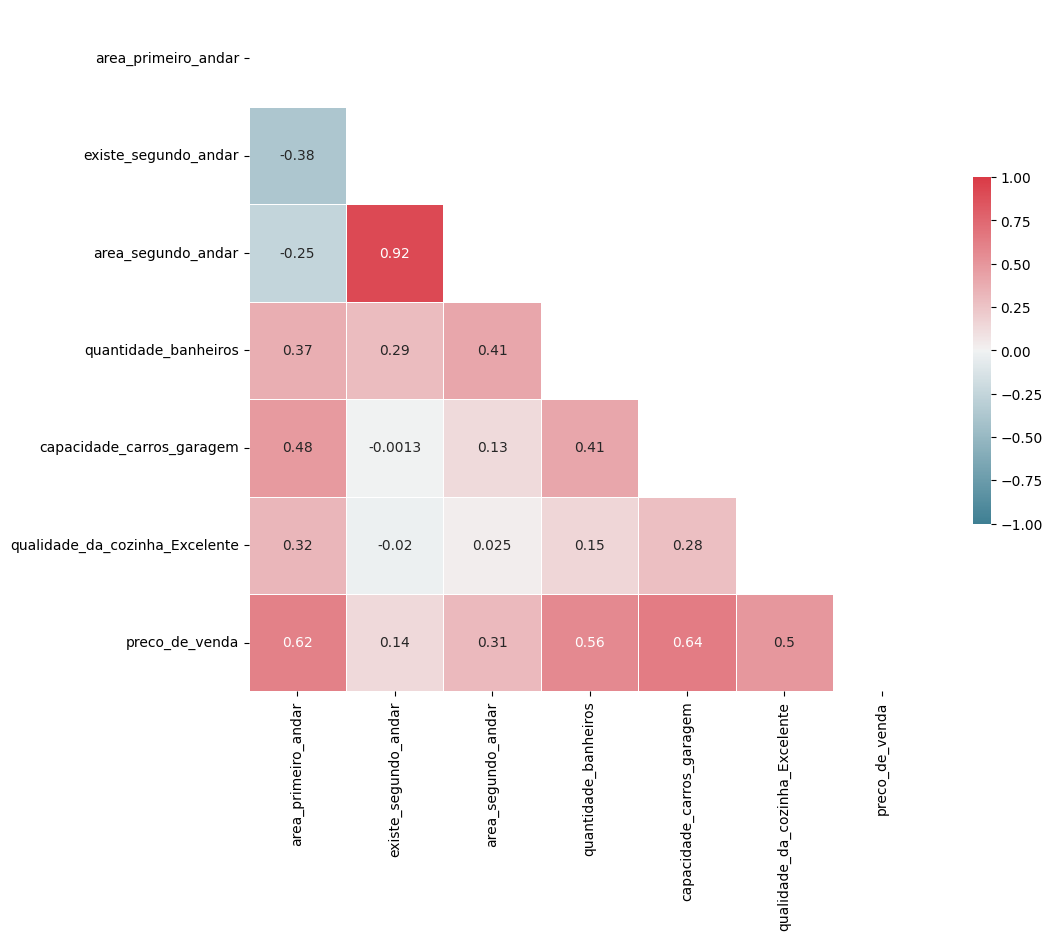

In [ ]:
# Atividade
# Quais fatores estão mais correlacionados?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo dados
dados = pd.read_csv("/content/Preços_de_casas.csv")
dados = dados.drop(columns = "Id")

# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()


Dica: Atente-se nos pontos abaixo para uma análise completa:

Intensidade: refere-se à força da relação entre as variáveis medidas.

Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.

Direção: refere-se à natureza da relação entre as variáveis medidas.

Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice-versa.
Exemplo:

O coeficiente de correlação linear entre a área do primeiro andar e o preço de venda é de 0.62, indicando uma correlação positiva moderadamente forte (intensidade). Em geral, à medida que a área do primeiro andar de uma casa aumenta, o preço de venda também tende a aumentar (direção).

## Relacionando variáveis

No vídeo anterior, entendemos que, aparentemente, a área do primeiro andar é bem correlacionada com o preço de vendas. Porém, podemos visualizar essa relação. Para isso, vamos estabelecer a visualização de um gráfico de dispersão. Vamos para o Google Colab analisar esse processo?

## Importando as bibliotecas

No Google Colab, começaremos a importar as bibliotecas que irão nos ajudar a visualizar os gráficos. A primeira será a matplotlib, apelidada plt. Para isso, adicionaremos o seguinte código:

In [ ]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Essa biblioteca traz visuais e gráficos um pouco mais simples. Em seguida, importaremos outra biblioteca, chamada seaborn, apelidada sns. Ela possui algumas práticas de visualizações otimizadas embutidas. Por fim, importaremos a biblioteca plotly, apelidada px.

Essas três bibliotecas irão nos ajudar a visualizar os dados.

## Correlacionando a área construída ao preço do imóvel

O próximo passo será fazer a relação entre área do primeiro andar (area_primeiro_andar) e preço de venda (preco_de_venda). Para isso, chamaremos o método plt.scatter() em uma nova célula.

Nesse caso, queremos a relação de dados['area_primeiro_andar'] e dados['preco_de_venda'].


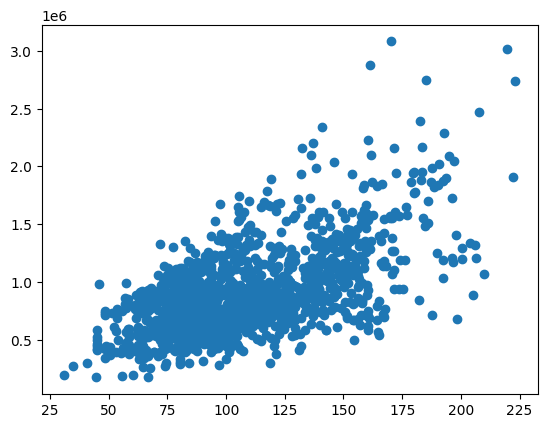

In [ ]:
# Como é a relação entre área construída e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])

Text(0, 0.5, 'Preço de venda')

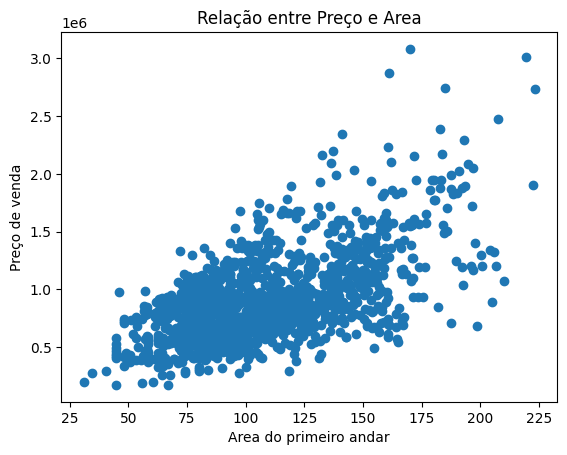

In [ ]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")


Além disso, podemos definir títulos para os eixos. Nesse caso, utilizamos os métodos plt.xlabel() e plt.ylabel(), recebendo os rótulos "Área do primeiro andar" e "Preço de venda", respectivamente.

Aparentemente, à medida que a área aumenta, o preço também aumenta. Talvez, para casas com uma área maior, os preços não estabeleçam uma relação tão linear, pois há uma explosão em determinado ponto do gráfico. Porém, essa relação linear ainda é visível.

Representando a relação linear
Nesse momento, podemos pensar o seguinte: qual é a melhor maneira de representar uma relação linear? Observando o gráfico anterior, provavelmente, você imaginou uma linha crescente.

Vamos tentar imprimir essa linha no gráfico de dispersão? Começaremos copiando o código de geração do gráfico e colando em uma nova célula:

Como podemos pensar em trazer a linha para o gráfico? Nesse caso, seria interessante estabelecer dois pontos. O primeiro ponto pode ser, por exemplo, uma casa qualquer no início do gráfico, no canto inferior esquerdo, que mede 66 metros quadrados e custa 250 mil reais, aproximadamente.

Após estabelecer esse primeiro ponto, podemos utilizar o método plt.axline() para definí-lo no gráfico, logo abaixo do método plt.scatter(). Entre parênteses, o xy1 será igual a esses pontos: primeiro o x, de 66 metros quadrados, e depois o y, de 250000 reais.

O segundo ponto que ajudará a construir a reta, será do canto superior direito do gráfico, formando uma linha crescente. Vamos considerar um ponto de, aproximadamente, 190 metros quadrados, e que custa, aproximadamente, 1 milhão e 800 mil reais. Nesse caso, definiremos o xy2 igual a 190 e 1800000.

Para finalizar, podemos adicionar uma cor diferente à linha, para distinguir entre os pontos do gráfico. Para isso, adicionamos o atributo color e definimos como "red", por exemplo.

Ao final, teremos a seguinte célula de código:

Text(0, 0.5, 'Preço de venda')

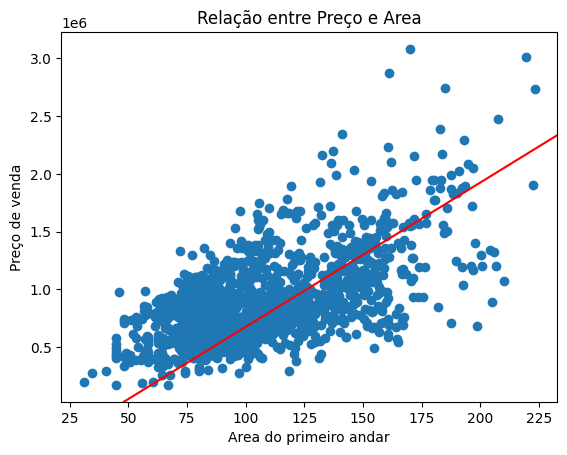

In [ ]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")



## Conclusão

Com isso, estabelecemos a reta desejada. Ela está linear e crescente, mas podemos pensar: será que essa é a melhor reta que representa a relação linear entre a área do primeiro andar e o preço de venda?

## Formatos do gráficos de dispersão

Sara está analisando dados e decidiu construir vários gráficos de dispersão para compreender a relação entre as variáveis do seu conjunto de dados. Agora, vamos ajudar Sara a entender o que cada gráfico representa.

Com base nos gráficos de dispersão realizados por Sara, qual das seguintes análises está correta? Escolha uma alternativa.

Os pontos estão espalhados aleatoriamente, sem mostrar nenhuma tendência clara entre as variáveis.

O gráfico de dispersão é uma excelente ferramenta para identificar tendência entre variáveis, no entanto também é possível identificar a ausência de correlação entre as variáveis, ou seja, quando não possuem relação linear clara uma com a outra, apresentando, dessa forma, pontos dispostos de forma aleatória

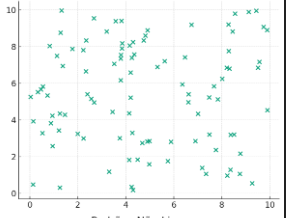

## Obtendo a melhor reta

## Melhor reta

Uma maneira de estabelecer a melhor reta, isto é, a reta mais centralizada dos pontos, é com o auxílio da biblioteca que importamos anteriormente: a biblioteca plotly, que possui um recurso que para gerar a melhor reta.

## Obtendo a melhor reta

Para definir essa reta, vamos chamar o método px.scatter(). Entre parênteses, indicaremos que x será igual a area_primeiro_andar entre aspas simples, enquanto y será igual a preco_de_venda.

Além disso, ainda entre parênteses, podemos chamar dados antes das definições de x e y. Existem também dois argumentos que irão trazer exatamente a linha mais apropriada. São eles:

    - trendline_color_override;

    - E trendline.

O trendline_color_override é a cor da melhor linha, definida como "red", enquanto a melhor linha propriamente dita é justamente o trendline, cujo método é o ols.

Ao longo do curso, entenderemos melhor o que é o método ols.

Ao final, teremos a seguinte célula de código:

In [ ]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

Foi gerado um gráfico com outros parâmetros, pois usamos uma biblioteca diferente, mas essa é a melhor representação linear entre área e preço, justamente por utilizar o método ols para trazer uma linha mais ajustada.

Quando passamos o cursor sobre essa linha no gráfico, conseguimos visualizar o preco_de_venda, a area_primeiro_andar, entre outras informações e métricas, bem como o que as métricas significam.

## Conhecendo a fórmula de ajuste da reta

Vamos recapitular o que fizemos? Para ajustar a reta, elencamos uma variável explicativa (X), que no nosso caso, é a área do primeiro andar (area_primeiro_andar).

Depois, trouxemos uma variável resposta (Y), ou seja, o preço de venda (preco_de_venda). Portanto, a área do primeiro andar explica o preço de venda.

Com base nisso, trouxemos o scatter plot (gráfico de dispersão) para visualizar os pontos na representação linear. Essa representação linear é melhor vista com uma reta, então trouxemos esse elemento. Para obter a melhor reta, existe uma fórmula generalizada:

    Yᵢ = B₀ + B₁ * Xᵢ

## Conclusão

Posteriormente, vamos entender cada um desses pontos e estimações. Por enquanto, devemos apenas entender que, com essa representação, conseguimos explicar o preço de venda a partir da área do primeiro andar. A melhor reta estabelecida, conforme definido no plotly, possui uma metodologia: a regressão linear, que estudaremos nos próximos passos.

Na sequência, aprenderemos o que cada termo da fórmula significa!

## O que aprendemos?

## Nessa aula, você aprendeu a:

   - Obter o coeficiente de correlação dos dados;

   - Analisar a intensidade e a direção da correlação entre duas variáveis;

   - Identificar linearidade no gráfico de dispersão;

   - Diferenciar variável explicativa de variável resposta;

   - Visualizar a melhor reta utilizando o Plotly.

# <font color=greeb>Aula 02 - Treino e teste</font>

# Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

Anteriormente, traçamos uma reta para representar a relação linear entre a área do primeiro andar e o preço de venda. Mas como essa reta foi determinada? Ao voltarmos ao nosso notebook, encontramos uma seção dedicada a explorar esse conceito na nossa segunda aula.

## Analisando o histograma

Nela, revisitamos os conceitos de variável explicativa e variável resposta, fundamentais para entender essa análise, e já dispomos de um gráfico elaborado, um histograma exibindo a distribuição dos preços de venda das casas:

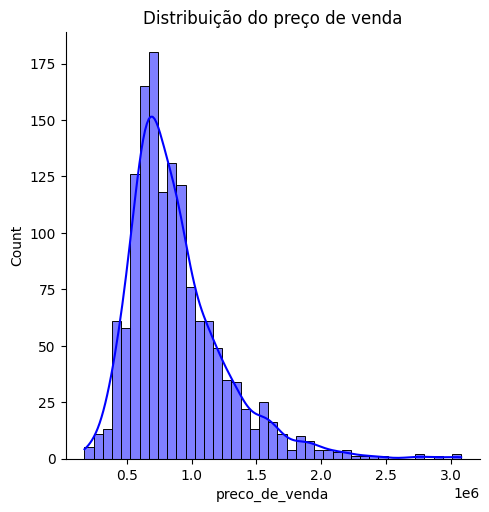

In [ ]:
# Quem é nossa variável resposta?

sns.displot(dados['preco_de_venda'], kde=True, color='blue')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

A observação principal é que a maioria das casas tem um preço de venda de até 1 milhão, aproximadamente, com algumas casas mais caras, em menor quantidade, ultrapassando os 2 milhões. Esse padrão sugere uma distribuição com uma cauda mais longa à direita, como frequentemente descrevemos. É crucial compreender que essa variável é a nossa resposta principal, aquela que buscamos prever com precisão.

## Divisão dos dados

Para estabelecer uma linha de regressão que seja relevante não apenas para esse conjunto de dados, mas também para outros conjuntos, optamos por dividir nosso conjunto de dados em duas partes: treinamento e teste. Essa abordagem nos permite treinar um modelo em uma parte dos dados e testá-lo em outra, avaliando assim sua capacidade de generalização.

Vamos começar dividindo nossos dados em dois conjuntos usando a função train_test_split, já importada do sklearn.model_selection.

In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split

## Estruturação dos conjuntos de dados

Em seguida, precisamos determinar que a variável de resposta, Y, será representada pelos dados de preço de venda, enquanto todas as outras variáveis formarão o conjunto X.

In [10]:
# Definindo y e X
y = dados['preco_de_venda']
X = dados.drop(columns = 'preco_de_venda')

Depois, aplicamos o train_test_split, especificando o tamanho do conjunto de testes (test_size) como 0,3, por exemplo. Isso significa que 30% dos dados serão elencados para teste e outros 70%, para treino. Geralmente, optamos por alocar a maior parte dos dados para o conjunto de treinamento e uma porção menor para o conjunto de teste, mas essa é uma convenção amplamente adotada dentro do campo de Machine Learning.

O segundo parâmetro será uma semente de aleatoriedade (random_state) para garantir a reprodutibilidade dos resultados. O definiremos como 230. Para garantir consistência nos conjuntos de treinamento e teste, podemos definir uma semente de aleatoriedade, conhecida como seed, que estabelece um ponto inicial para a geração de números aleatórios.

In [11]:
#Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

Após a divisão dos dados, armazenamos os conjuntos de treino e teste. O train_test_split retorna quatro objetos: X_train, X_test, Y_train e Y_test.

## Criação dos dados para treinamento

Agora, vamos criar um conjunto de dados para treinamento, representado pelo df_train, um dataframe que estamos gerando. Aqui, X_train será o nosso conjunto de características, enquanto Y_train será o conjunto de valores de destino.

In [12]:
#Dados de treino para usar a fórmula

df_train = pd.DataFrame(data= X_train )
df_train['preco_de_venda'] = y_train

Estamos estruturando este dataframe de treino porque planejamos utilizar uma biblioteca específica do Python. A importação desta biblioteca é from statsmodels.formula.api import ols. Ela nos permite construir um modelo de regressão, que representa a reta discutida anteriormente.

In [14]:
# import ols
from statsmodels.formula.api import ols

## Inicialização do modelo

Agora, vamos inicializar o primeiro modelo como modelo_0. Com essa biblioteca importada, chamaremos ols() e definiremos a relação entre o 'preco_de_venda' e a 'area_primeiro_andar', utilizando os dados contidos em df_train. Em seguida, podemos ajustar esse modelo usando o método .fit().

In [15]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train ).fit()

## Recapitulação e próximos passos

Agora que ajustamos a reta e o modelo, vamos recapitular o que foi feito.

Dividimos o conjunto de dados em duas partes: uma para treinamento e outra para teste. Essa abordagem visa garantir que nosso modelo de regressão, responsável por estabelecer a reta, não fique limitado a um único conjunto de dados, mas seja capaz de generalizar. Além disso, podemos avaliar a capacidade desse modelo de se generalizar para novos conjuntos, ou seja, ele não se restringe apenas às áreas específicas do primeiro andar presentes nos dados de treinamento.

A seguir, vamos examinar mais de perto o modelo que acabamos de treinar!

## Separando o conjunto de dados

Diana está iniciando os seus estudos em data science e percebeu que separar conjuntos de dados em treino e teste é uma prática recorrente em machine learning.

Com base nisso, surge a pergunta: Qual é a principal razão para dividir um conjunto de dados em conjuntos de treino e teste ao construir modelos de machine learning? Escolha uma alternativa.

Para avaliar o desempenho do modelo em dados não vistos.


Dividir o conjunto de dados em conjuntos de treino e teste é uma prática essencial em machine learning para avaliar a capacidade de generalização do modelo. O conjunto de treino é usado para treinar o modelo, enquanto o conjunto de teste é mantido separado e usado para avaliar o desempenho do modelo em dados não vistos, simulando como o modelo se comportaria ao ser aplicado em situações reais

## Analisando os coeficientes

(intensidade, direção e significância)




Anteriormente, fizemos o treinamento de um modelo de regressão linear para analisar como o tamanho do primeiro andar influencia no preço da casa. Agora, surge a pergunta: qual é o impacto exato do tamanho do primeiro andar no estabelecimento do preço da residência? Para compreender essa relação, é necessário interpretar os parâmetros da regressão linear ajustada.

## Visualizando parâmetros

Vamos ao Google Colab para acessar esses parâmetros. No Colab, encontramos o modelo previamente treinado, denominado modelo_0. Para entender o impacto da área do primeiro andar no preço de venda, vamos utilizar o método paramrs.

In [16]:
# visualizando os parametros

modelo_0.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


Como podemos interpretar esse coeficiente? Seu valor está expresso em reais (R$), considerando que a unidade de medida do preço de venda também está em reais. Isso significa que, em média, um aumento de 1 metro quadrado na área do primeiro andar está associado a um acréscimo de R$ 6.793 no valor da casa.

## Interpretação do intercepto

Mas e se a área do primeiro andar for zero? Ou seja, se não houver área construída no primeiro andar? Nesse caso, recorremos à interpretação do intercepto. Espera-se que, em média, uma casa sem área no primeiro andar tenha um preço de venda de R$ 152.909.

Além do efeito quantitativo dos coeficientes, é importante observar também o sinal deles. No caso do efeito da área do primeiro andar, o sinal é positivo, indicando uma relação linear positiva. Isso significa que um aumento na área do primeiro andar contribui positivamente para o preço médio da casa.

## Resumo do modelo

Outro ponto relevante é a significância do efeito. No caso da área do primeiro andar, é importante observar se ela produz um efeito significativo no preço de venda da casa. Podemos analisar isso ao acessar o modelo usando o método .summary(), que nos fornece informações detalhadas sobre os coeficientes. Para facilitar a visualização do retorno, usaremos o método print().

In [17]:
# o resumo do nosso modelo
print(modelo_0.summary())


                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        19:52:24   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

Ao executar, obtemos uma série de informações detalhadas sobre o modelo.

Retorno omitido.

Entre essas informações, podemos visualizar os efeitos, incluindo o intercepto e o coeficiente associado à área do primeiro andar. Além disso, temos acesso ao erro, ao valor de teste t e ao p-valor para a área do primeiro andar. Quando o p-valor é significativamente baixo, isso indica que a área do primeiro andar tem um impacto significativo no preço de venda da casa. Portanto, ao analisar os coeficientes, é importante considerar o sinal, a magnitude e a significância do efeito.

## Recapitulação e aprofundamento

Agora, vamos recapitular o que fizemos e aprofundar nossa compreensão desses dois coeficientes: o intercepto e o efeito atrelado associado à variável explicativa (X).

Começamos identificando a variável explicativa (X), que é a área do primeiro andar, e a variável resposta, que é o preço de venda da casa. Exploramos a relação entre elas por meio de um diagrama de dispersão e compreendemos como uma linha de regressão linear melhor ajustada representa essa relação, fornecendo uma fórmula associada: Yi = B0 + B1*Xi.

B0 representa o intercepto. Ou seja, B0 representa o valor esperado do preço de venda quando a área do primeiro andar é zero. Em outras palavras, é o preço estimado da casa quando não há área construída no primeiro andar. No gráfico, ele corresponde ao ponto onde a linha de regressão intercepta o eixo y, quando X é igual a zero.

Por sua vez, o coeficiente B1 representa o coeficiente atrelado ao efeito de Xi, então está associado ao efeito da variável explicativa, representando a inclinação da reta de regressão.

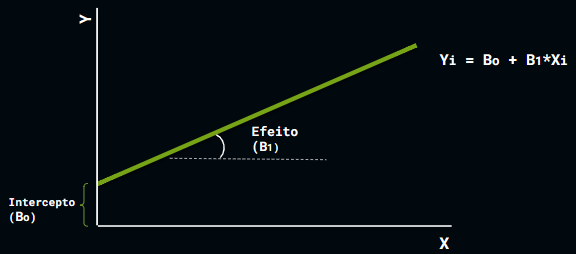

## Próximos passos

Agora que compreendemos o impacto da área construída do primeiro andar no preço de venda da casa, podemos avaliar o quanto essa variável explica as variações observadas no preço da casa.

Como podemos interpretar esse coeficiente? Seu valor está expresso em reais (R$), considerando que a unidade de medida do preço de venda também está em reais. Isso significa que, em média, um aumento de 1 metro quadrado na área do primeiro andar está associado a um acréscimo de R$ 6.793 no valor da casa.

## Interpretação do intercepto

Mas e se a área do primeiro andar for zero? Ou seja, se não houver área construída no primeiro andar? Nesse caso, recorremos à interpretação do intercepto. Espera-se que, em média, uma casa sem área no primeiro andar tenha um preço de venda de R$ 152.909.

Além do efeito quantitativo dos coeficientes, é importante observar também o sinal deles. No caso do efeito da área do primeiro andar, o sinal é positivo, indicando uma relação linear positiva. Isso significa que um aumento na área do primeiro andar contribui positivamente para o preço médio da casa.

Resumo do modelo

## Interpretação do coeficiente

Ao executá-lo, obtivemos dois fatores: o intercepto e um coeficiente que representa a área do primeiro andar, o efeito que estamos analisando.

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Para saber mais: estimação da regressão linear simples

 A regressão linear foi a metodologia que ajustou a melhor reta que representa linearmente a interação entre X e Y; no nosso caso, o tamanho da área do primeiro andar e o preço de venda da casa.

Vale recapitular cada componente da regressão linear:

## Função

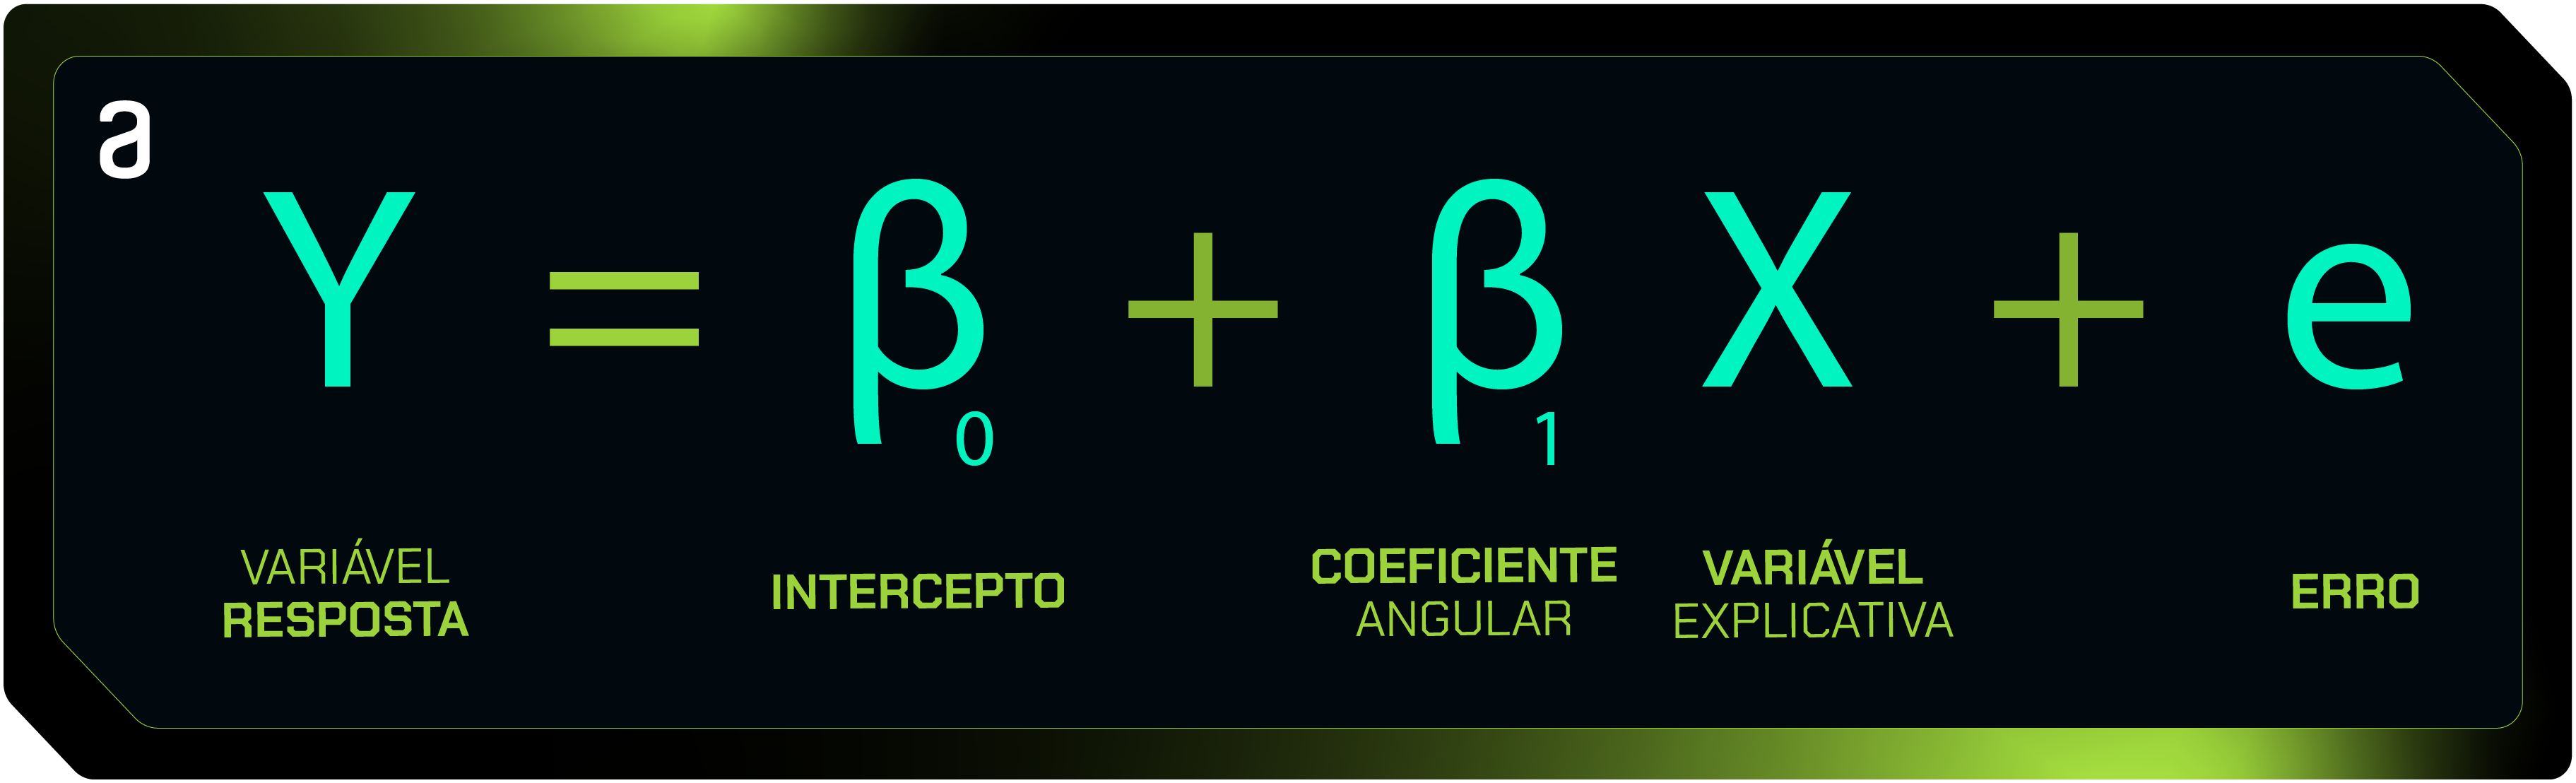

  - Variável Resposta (Y): Também chamada de variável dependente é aquela que estamos tentando prever.

  - Intercepto (β₀): O ponto onde a linha de regressão intercepta o eixo vertical (Y), ou seja, o valor de Y quando X é igual a 0.

  - Variável Explicativa (X): Também chamada de variável independente e é o fator que usamos para prever e explicar a variável resposta.

  - Coeficientes de Regressão (β₁): Impacto de cada variável explicativa X na variável resposta, é o efeito de X em Y.

  - Erro Residual (e): Diferença entre os valores reais e previstos da variável resposta.

## Coeficientes

A relação linear entre as variáveis X e Y é representada graficamente por uma linha. Este processo de encontrar a linha ideal envolve minimizar a distância entre os pontos reais e a própria linha.

O ajuste da linha de regressão linear é simplificado pelo método dos mínimos quadrados. Este método visa encontrar a linha que melhor se ajusta aos dados observados, minimizando a soma dos quadrados das diferenças entre os valores reais e os valores previstos pela linha e calculando os coeficientes do modelo.



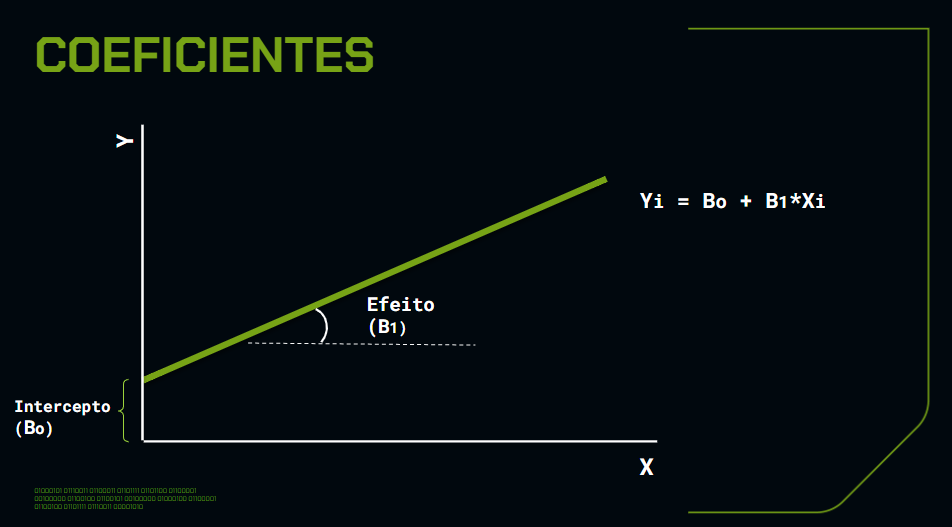

# Interpretando o R²

Já entendemos o papel de cada coeficiente na representação da relação linear entre o tamanho e o preço de uma casa!

No entanto, surge a pergunta: será que o metro quadrado do primeiro andar é suficiente para explicar o preço da casa? Para responder a essa questão, precisamos acessar uma métrica que aborda a explicabilidade do modelo. Vamos ao Google Colab para extrair essa métrica do nosso modelo!

## Obtendo o R²

No Colab, vamos recuperar o modelo_0, que é o modelo que ajustamos, e acessar o rsquared.

## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [19]:
# observando o R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Interpretando o R²

O coeficiente R², também conhecido como coeficiente de determinação, retornou 0.37. Podemos interpretar isso como 37% da variação nos preços das casas sendo explicada pelo tamanho do primeiro andar. Isso representa uma quantidade significativa de explicação, mas há mais a ser analisado.

Quanto mais próximo de 1 o valor de R², melhor é a explicabilidade do modelo. Então, apesar de termos 37% de explicação com apenas uma variável, é importante compreender que outros fatores podem influenciar os preços das cas

## Próximos passos

Aproximadamente 62% da variação dos preços não está sendo explicada pelo tamanho do primeiro andar. Essa variação pode ser atribuída a outros fatores, como o número de banheiros ou quartos. Precisamos explorar essas variáveis para entender melhor o modelo.

Além do R², é fundamental analisar outros aspectos do nosso modelo. Vamos prosseguir com essa análise?

## Para saber mais: explicabilidade

O coeficiente de determinação, frequentemente chamado de R², é uma medida estatística que indica o quanto a variabilidade da variável dependente (resposta) é explicada pelo modelo de regressão linear.

## Interpretando o R²

Ele varia de 0 a 1, um valor próximo de 1 indica que o modelo ajusta bem os dados, explicando a maioria da variação na variável dependente/resposta. Já um valor próximo de 0 indica que o modelo não consegue explicar muita variação na variável dependente/resposta.

## Usando no teste

Além disso, o R² pode ser usado para comparar o desempenho do modelo em diferentes conjuntos de dados, como treinamento e teste. Isso ajuda a identificar problemas de overfitting (ajuste excessivo) ou underfitting (ajuste insuficiente). Idealmente, desejamos que o R² seja consistente entre os conjuntos de treinamento e teste, indicando uma boa capacidade de generalização do modelo para novos dados.

## Fórmula

Uma das fórmulas do R² pode ser representada pela razão entre a variação explicada e pela variação total. Por isso que dizemos que quanto mais perto do 1 melhor é adequação do modelo, já que a variação explicada será mais próxima da variação total nessa razão.

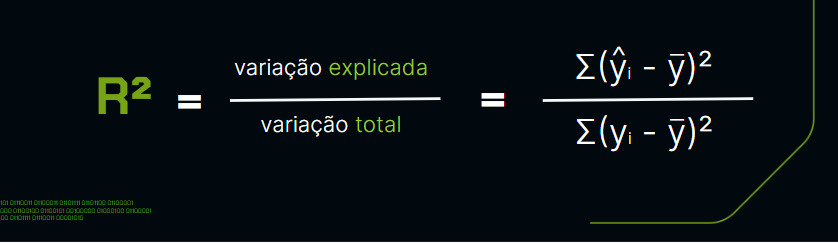


## Entendendo o resíduo

Já exploramos o modelo ajustado, interpretamos os coeficientes e analisamos o R², mas como podemos ter certeza que esse modelo está fazendo boas previsões? Como podemos avaliar se estamos estimando adequadamente o preço de venda das casas?

Para responder a essas perguntas, podemos voltar à visualização da reta que representa a relação entre a área do primeiro andar e o preço de venda da casa:

Por exemplo, na observação 1.303 para uma casa, tivemos uma diferença de R$ 193.023,00 a menos em relação ao preço estimado. Isso significa que estamos precificando essa casa um pouco abaixo do valor real de venda.

## Distribuição dos resíduos

Podemos visualizar o comportamento dos resíduos por meio de um histograma. Faremos isso utilizando .hist() e adicionando um título para tornar a apresentação mais clara.

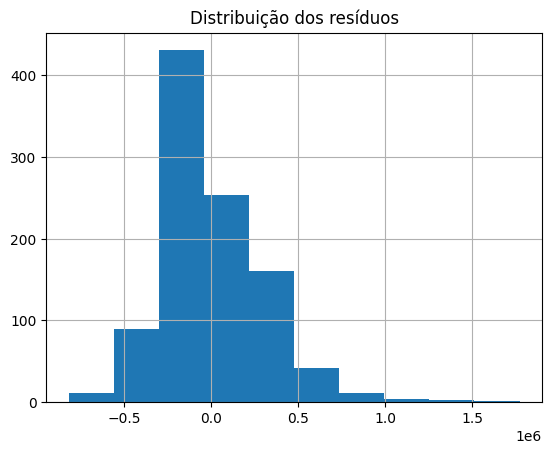

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()




Ao observarmos o comportamento dos resíduos, percebemos que a maioria deles está próximo de zero, o que é desejável, pois indica que nosso modelo está cometendo menos erros.

Para determinar se o modelo está bem ajustado, é importante que a distribuição dos resíduos siga uma forma de sino, conforme esperado pela teoria da regressão linear.

Além disso, queremos que a maioria dos resíduos esteja concentrada em torno de zero, o que sugere que a diferença entre os valores observados e os valores estimados é pequena.

## Entendendo o que são resíduos

Vamos a um resumo do conceito de resíduos. Quando temos a variável explicativa relacionada com a variável resposta, observamos essa relação por meio do diagrama de dispersão, ajustamos uma reta que representa o comportamento médio das observações e, ao verificarmos a diferença entre o valor estimado pela reta e o valor observado, essa diferença é o nosso resíduo.

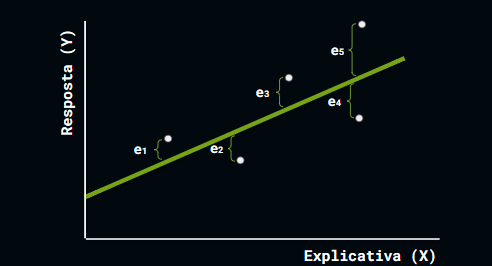

![](https://i.imgur.com/CJMdXpf.png)

Isso é calculado para todas as nossas observações. E esperamos que esses resíduos estejam próximos de zero, indicando que nossa reta está bem ajustada aos dados observados.

## Próximos passos

Agora que entendemos o conceito de resíduos, é importante avaliar o desempenho do nosso modelo na base de teste, aquela parte que não foi utilizada durante o treinamento. É isso que abordaremos nos próximos passos

## Obtendo o R² da previsão

Com o modelo treinado e ajustado para utilizar o tamanho do primeiro andar na predição do preço das casas, surge a necessidade de avaliar sua capacidade de prever com precisão os preços das casas!

Para isso, é essencial acessar o conjunto de dados reservado para teste no início do processo. Lembram-se de que dividimos o conjunto de dados em duas partes: uma para treinamento, onde o modelo foi ajustado com base nos dados disponíveis, e outra para teste, na qual o modelo não teve acesso aos preços das casas.

Agora, nosso objetivo é utilizar o modelo para prever os preços das casas no conjunto de teste e comparar essas previsões com os preços reais de venda das casas. Vamos ao Colab para iniciar essa etapa.

## Fazendo previsões

Para fazer predição, utilizaremos o método .predict() com base nos dados de teste X_test. O resultado dessas previsões será armazenado em y_predict.

In [29]:
# definindo o Y previsto
y_predict = modelo_0.predict(X_test)

## Avaliando o desempenho do modelo

Na sequência, faremos a importação da função r2_score do módulo sklearn.metrics para comparar as previsões do modelo com os valores reais. Este processo nos permitirá avaliar o quão bem o modelo está performando em termos de previsão.

In [30]:
# importando o r2_score
from sklearn.metrics import r2_score

Feita essa importação, vamos solicitar a visualização com print() passando R2: e r2_score(y_test, y_predict).

In [31]:
# printando o r²
print("R²: ", r2_score(y_test,y_predict ))

R²:  0.38530928723202407


## Conclusão

Já entendemos que o coeficiente de determinação (R²) está associado à explicabilidade do nosso modelo. Porém, é crucial realizar outra análise.

Quando examinamos o R² entre os conjuntos y_test e y_predito - isto é, entre os valores observados e os valores previstos pelo modelo - esperamos que esse número seja similar ao R² obtido durante o treinamento.

Ao voltarmos e verificarmos o R² do treinamento, que foi de 0.37, notamos que os valores de 0.37 e 0.38 estão bastante próximos. Isso sugere que o modelo está se comportando de maneira consistente tanto nos dados de treinamento quanto nos dados de teste.

É fundamental lembrar que esse valor representa a proporção da variação nos preços das casas explicada pela área do primeiro andar, que é de aproximadamente 38%. No entanto, ainda restam 62% da variação que não é explicada por essa variável. Esses fatores não considerados precisarão ser adicionados ao nosso modelo para melhorar sua capacidade de previsão.

## Faça como eu fiz: analisando a variável resposta

Durante esta aula, focamos em analisar o comportamento da variável resposta, ou seja, compreender o preço de venda da casa.

Para isso, fizemos um histograma como recurso visual para facilitar essa análise.

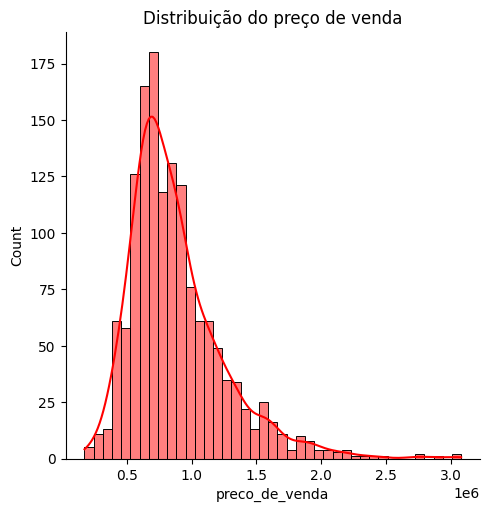

In [33]:
sns.displot(dados['preco_de_venda'], kde=True, color='red')
plt.title('Distribuição do preço de venda')
plt.show()

Nesta atividade, aplique a função displot da biblioteca Seaborn (sns) e explore os aspectos da visualização de dados. Para isso, utilize seus conhecimentos adquiridos até o momento e desenvolva suas habilidades ainda mais.

Esta função é usada para criar um gráfico de distribuição. O parâmetro kde=True indica que queremos traçar a densidade de kernel estimada sobre o histograma. Através deste exercício prático, você terá a possibilidade de visualizar a forma da distribuição com mais suavidade.

Ao executar, conseguimos identificar uma assimetria nos dados. Temos alguns imóveis cujo preço de venda está longe do comportamento mediano, ou seja, a presença de valores muito altos sugere a existência de propriedades de alto valor, em comparação com a maioria das outras propriedades no conjunto de dados.

Vale salientar que identificar simetria na distribuição da variável resposta pode facilitar a interpretação dos resultados, pois valores extremos podem influenciar a análise e as decisões tomadas com base no modelo de regressão linear.

## O que aprendemos?

## Nessa aula, você aprendeu a:

   - Dividir a base de dados para treinar e testar o modelo;

   - Interpretar os coeficientes de regressão linear simples;

   - Calcular e interpretar o coeficiente de determinação R²;

   - Analisar o quanto cada ponto de dados desvia da linha de regressão ajustada através dos resíduos;

   - Compreender quão bem os valores observados se ajustam ao modelo de regressão com R²;

   - Calcular o R² no conjunto teste.

# <font color=greeb>Aula 03. Adicionando outras características</font>

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

Vamos continuar o projeto. Anteriormente, ajustamos um primeiro modelo de regressão linear, que tem como variável explicativa o tamanho do primeiro andar, explicando, portanto, o preço da casa.

No entanto, sabemos que podemos adicionar outros fatores para explicar o preço de venda. O que podemos fazer é analisar quais fatores candidatos podem ser inseridos nesse modelo. Vamos ao Google Colab para entender quais outros fatores podemos analisar.

Analisando os Fatores
No Colab, na seção da aula 3, temos uma subseção chamada "Analisando os fatores" para visualizar outros fatores presentes no dataset que carregamos. Na célula dessa subseção, abaixo do comentário, vamos chamar uma biblioteca que já importamos, o Seaborn, que apelidamos como sns. Em seguida, vamos usar uma visualização chamada pairplot, com os dados entre seus parênteses.

## Analisando os fatores

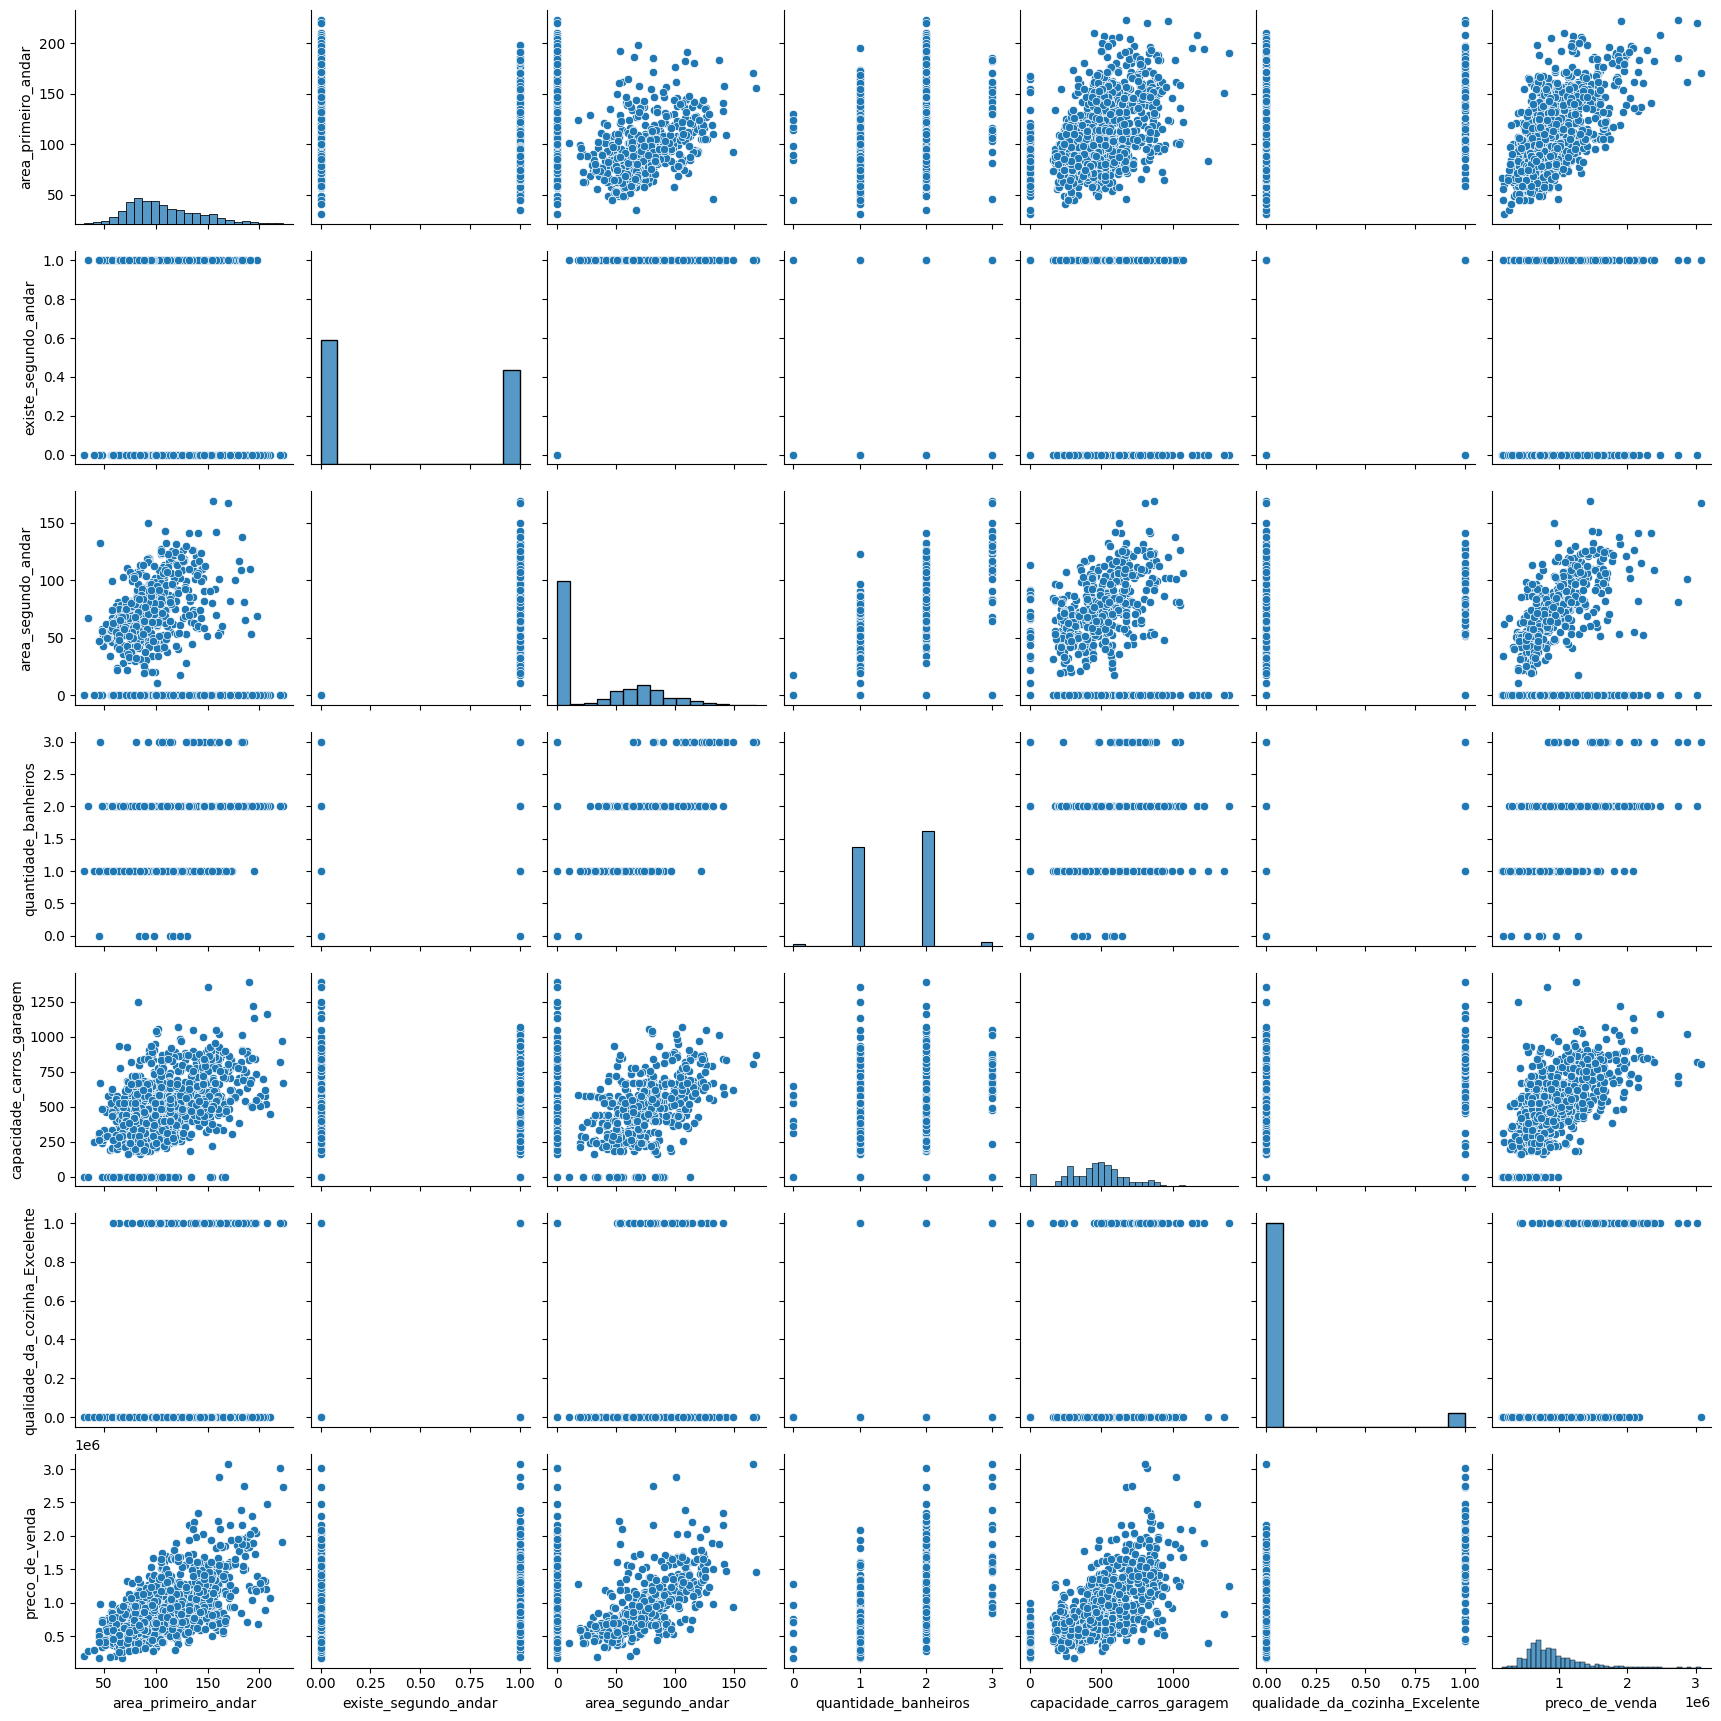

In [34]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

Ao executar a célula, essa visualização do pairplot vai cruzar todos os fatores entre si e fazer um par de gráficos para cada variável.

Ao observar o terceiro gráfico na primeira linha, que representa a área do primeiro andar, e descermos a visualização, veremos que ele se cruza com a terceira coluna, que representa a área do segundo andar. Ou seja, nesses cruzamentos temos todas as possibilidades de visualização entre uma variável e outra que está presente no conjunto de dados que carregamos.

Podemos fazer uma análise um pouco mais focada, filtrando apenas com a variável resposta. Ao acessar a célula abaixo dessa visualização e executar dados.columns, por exemplo, ele vai trazer todas as colunas que temos dentro de dados.

In [35]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

Na célula seguinte, que possui um comentário, vamos colar o sns.pairplot(dados), e entre os parênteses, adicionar uma vírgula e os y_vars, ou seja, o que está no eixo y, filtrando apenas para preco_de_venda.

Após isso, podemos filtrar o x_vars por quantidade_banheiros, por exemplo. Com isso, vamos fazer essa análise exploratória do preço de venda com a quantidade de banheiros.

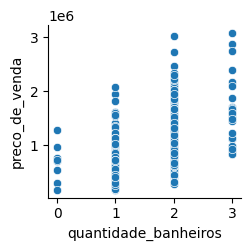

In [37]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = 'quantidade_banheiros')

Após a execução, veremos que ele só trouxe o gráfico de análise entre a quantidade de banheiros e o preço de venda. Nele, podemos ver que, à medida que temos mais banheiros dentro da casa, o preço da venda mínimo vai aumentando.

Voltando à célula executada, vamos abrir uma lista envolvendo o quantidade_banheiros e colocar outras variáveis dentro dessa análise. Podemos colocar a area_segundo_andar, vista nos passos anteriores, e a capacidade_carros_garagem.

Nessa etapa, estamos fazendo uma análise exploratória das variáveis para descobrir quais são as variáveis candidatas para entrar nesse modelo e explicar o preço de venda.

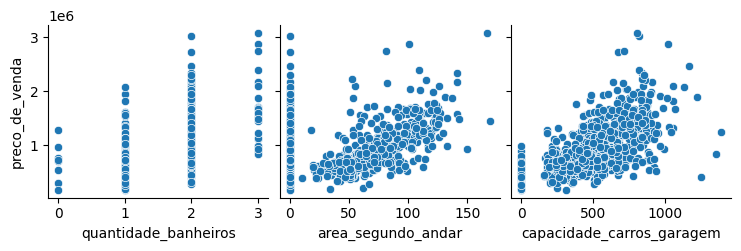

In [36]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'] )


Vemos que parece haver uma relação linear na area_segundo_andar, mas há várias casas que não têm o segundo andar. Também parece haver uma relação linear na capacidade_carros_garagem, só que alguns pontos fogem dessa relação. E também vemos que há algumas casas sem capacidade de ter carros na garagem.

Essa é uma análise que podemos fazer para identificar outras variáveis que podem explicar o preço de venda da casa. Ou seja, o pairplot é uma ferramenta valiosa para visualizar a relação das variáveis, não só entre a variável resposta e outras candidatas explicativas, mas também a relação entre as explicativas.

Essa ferramenta também nos auxilia a tomar a primeira decisão de incluir ou não determinados dados em um modelo.

Após verificar essa análise entre as variáveis, podemos incluí-las em um modelo de regressão linear.

## Importância das variáveis

Imagine que você é um(a) analista de dados trabalhando no Banco Bytebank. Esse banco deseja oferecer aos seus clientes empréstimos com taxas de juros mais precisas, baseadas em uma análise detalhada do valor das propriedades. Para isso, você deve desenvolver um modelo de regressão linear que possa prever o preço de venda de casas com base em diversas características.

Inicialmente, você ajustou um modelo, utilizando apenas o tamanho do primeiro andar como variável. No entanto, para aprimorar seu modelo, você decide explorar outros fatores que podem influenciar o preço de venda, utilizando a ferramenta pairplot para visualizar as relações entre essas variáveis e o preço.

Quais das seguintes afirmações melhor descreve a importância de incluir múltiplas variáveis explicativas no modelo de regressão linear?

Ao adicionar mais variáveis explicativas relacionadas ao preço de venda das casas, o modelo se torna menos propenso a viés, pois considera uma gama mais ampla de características que afetam o valor do imóvel, proporcionando estimativas mais precisas.


A inclusão de mais variáveis explicativas pode ajudar a reduzir o viés e melhorar a precisão do modelo, considerando uma variedade mais ampla de fatores que influenciam o preço de um imóvel

## Adicionando variáveis no modelo

Após analisar variáveis candidatas para explicar o preço de venda da casa, podemos, finalmente, ajustar alguns modelos de regressão linear para entender o efeito dessas variáveis na determinação do preço de venda.

Se quiser, pode pausar esta aula e revisar o plot que fizemos, talvez pensar e gerar hipóteses sobre quais variáveis podemos incluir no modelo. A análise exploratória é sempre útil para estimular o pensamento crítico sobre quais variáveis podem ser incluídas e explicativas.

## Ajustando Modelos

Voltando ao Colab, vamos acessar a primeira célula da subseção "Adicionando fatores ao modelo" e importar outra biblioteca dos status models. Para isso, abaixo do comentário, vamos adicionar um import statsmodels.api e apelidá-lo de sm.

In [38]:
# importando a api do statsmodels
import statsmodels.api as sm

A primeira mudança que precisamos fazer é adicionar o efeito do intercepto, adicionando uma constante para estimar o intercepto. Para isso, abaixo do comentário na célula seguinte, vamos colocar X_train = SM.add_constant(X_train), onde sm é o apelido do statsmodels.api.

Estamos adicionando uma constante em X_train, a base que estamos treinando, e atribuindo a ela mesma.

In [39]:
# adicionando o constante
X_train = sm.add_constant(X_train)


Em seguida, vamos rodar a célula do import e depois, a do X_train.

Se chamarmos e executarmos o X_train.head() na célula seguinte, perceberemos que ele adicionou 1 em todas as observações de caso. Isso vai nos ajudar a estimar os interceptos.

In [40]:
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


## Testando Modelos

Nesse momento, vamos testar alguns modelos. Podemos testar os que acharmos mais necessários.

Por exemplo, seria interessante fazer um modelo saturado, ou seja, com a maioria das variáveis explicativas que acreditamos poder explicar o preço da casa. Na célula seguinte, temos um comando pronto:

In [41]:
X_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [42]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

Esse modelo está explicando o preço da casa com base em todas essas variáveis. Nele, temos a biblioteca sm utilizada, o método OLS que ajusta uma regressão linear, a variável resposta y_train e o X_train. Entre os colchetes, adicionamos as variáveis que serão exibidas: const, area_primeiro_andar, existe_segundo_andar, area_segundo_andar, quantidade_banheiros, capacidade_carros_garagem e qualidade_da_cozinha_Excelente.

Vamos executar a célula.

Na célula seguinte, podemos olhar outro modelo pronto:

In [43]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

Ao realizar uma análise crítica disso, temos duas informações do segundo andar: se ele existe e qual sua área. Por isso, ao adicionar todas as variáveis entre os colchetes, adicionamos somente uma dessas duas (existe_segundo_andar) para não exibir duas informações explicando a mesma coisa.

Podemos executar essa célula, criando um modelo sem a área do segundo andar.

Na próxima linha, temos outro modelo no qual podemos pensar:

In [45]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

Esse modelo não tem a informação da garagem. Em seu interior, trouxemos as mesmas variáveis, só que sem as informações da capacidade de carros da garagem.

Podemos executar essa célula também.

No momento, estamos conjecturando explicações. Ainda não analisamos qual é o melhor modelo.

Inclusive, podemos fazer a análise do efeito desses modelos. Para ter informações sobre esses modelos, vamos acessar a próxima célula, correspondente ao modelo 1, e chamar o summary desse modelo. Para visualizar melhor, faremos um print nele.

In [46]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          2.79e-289
Time:                        20:51:06   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Em seu interior, temos o R-squared (R ajustado) que aumentou para 0.741 no modelo 1. Mais abaixo, temos o efeito de cada variável para explicar o preço de venda da casa.

Vamos rodar para todos, preenchendo as duas células seguintes, correspondentes aos modelos 2, que não tem a área do segundo andar, e 3, que não tem a informação sobre a garagem. Basta inserir o print com o nome do modelo e .summary, executando as duas células em seguida.

Modelo 2:

In [47]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          1.93e-264
Time:                        20:52:14   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [48]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          4.15e-227
Time:                        20:52:23   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Nos próximos passos, vamos analisar a diferença entre cada modelo que ajustamos.

## Comparando modelos
Qual o melhor modelo?


Vamos recapitular tudo o que fizemos e o que temos para analisar. Temos quatro modelos ajustados: o modelo zero, que só tinha uma variável explicativa — a área do primeiro andar explicando o preço da casa — e ajustamos, por último, três modelos com diferentes variáveis explicativas.

Nesse vídeo, precisamos comparar um a um. Uma forma de fazer isso é utilizando a métrica R², o coeficiente de determinação.

# Comparando os Modelos

Vamos acessar o Colab para trazer e imprimir tudo isso. Descendo até a primeira célula da subseção "Comparando modelos", vamos criar uma linha abaixo do print existente e colocar um print("Modelo 0: ", modelo_0.rsquared), onde chamamos o modelo_0 com o método R².

In [49]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


Ao executar essa impressão, veremos que o modelo 0 deu 37% da variabilidade do preço das casas, a qual está sendo explicada pela variável explicativa, que é o tamanho da casa.

O primeiro modelo só tinha uma variável explicativa, que foi a mais relacionada no início. Quando adicionamos todas as variáveis explicativas no modelo saturado, o R² saltou. Inclusive, os outros modelos possuem um R² maior em comparação a um modelo com uma única variável explicativa.

Retorno:

R²

    Modelo 0: 0.37728010994297867

    Modelo 1: 0.7414024156090393

    Modelo 2: 0.7081440416220739

    Modelo 3: 0.6511289354898803

Podemos pensar também se que o R² é sensível em relação à quantidade de aspectos explicativos que temos no modelo. Para isso, vamos entender quantos parâmetros ou variáveis explicativas tem cada modelo.

Na célula seguinte, vamos colocar um print do len de modelo_0.params para saber o seu tamanho e os parâmetros estimados.

Em seguida, vamos fazer o mesmo para os modelos 1, 2 e 3.

In [50]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


Temos o número 2 para o modelo 0, porque há dois parâmetros: o intercepto e o efeito do primeiro andar. Já no primeiro modelo temos sete variáveis explicativas, ou seja, sete aspectos explicando o preço da casa — nesse modelo temos, inclusive, o maior R². Isso porque há uma relação entre o R² e a quantidade de fatores explicando o preço da casa.

É importante entender esse aspecto do R², porque, apesar de estarmos falando sobre o quão explicativo está o modelo, ele também é ponderado pela quantidade de fatores explicativos que incluímos no modelo.

Mas como escolhemos o melhor modelo? Para isso, precisamos analisar o resumo de todos os modelos que ajustamos até agora.

## Escolhendo o Melhor Modelo

Vamos subir o notebook para nos atentar à nota de rodapé que aparece no resumo dos modelos que ajustamos. No modelo , temos a nota 2 que indica a provável existência de multicolinearidade — ou seja, aparentemente, existem alguns efeitos que não estão conseguindo isolar a explicação do preço da casa e estão sendo confundidos.

[2] The condition number is large, 3.24e+03. This might indicate that there are strong multicollinearity or other numerical problems.

Vamos explorar melhor esse conceito nos próximos passos, mas isso é um indício ruim de um modelo.

O resumo do modelo 2 também tem essa nota de rodapé para tomarmos cuidado e verificar se realmente tem isso.

[2] The condition number is large, 2.6e+03. This might indicate that there are strong multicollinearity or other numerical problems.

Já no resumo do modelo 3 não aparece esse indício de multicolinearidade.

Temos outro ponto a analisar (este mais técnico). Quando temos um modelo saturado, que tem todas as informações, temos dois efeitos que falam sobre o segundo andar: a área do segundo andar e se existe um segundo andar. Quando olhamos para o resumo do primeiro modelo, vemos que existe_segundo_andar tem um efeito negativo.

==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
…                                …             …          …           …        …           …
existe_segundo_andar           -1.344e+05   3.28e+04     -4.100      0.000   -1.99e+05   -7.01e+04
…                                …             …          …    

Entretanto, quando tiramos a área do segundo andar no modelo 2, o efeito fica positivo.

==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
…                                …             …          …           …        …           …
existe_segundo_andar            1.929e+05   1.65e+04     11.713      0.000    1.61e+05    2.25e+05
…                                …             …          …           …        …           …

Isso é um de que existe um efeito de confundimento quando tiramos uma das informações do segundo andar.

Se olharmos para o último modelo, o existe_segundo_andar também possui um efeito positivo, reforçando o possível confundimento quando temos duas variáveis falando sobre o mesmo aspecto — nesse caso, o segundo andar da casa.

==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
…                                …             …          …           …        …           …
existe_segundo_andar            2.213e+05   1.79e+04     12.390      0.000    1.86e+05    2.56e+05
…                                …             …          …           …        …           …

Com isso em mente, qual pode ser o critério de escolha do modelo? Podemos escolher um modelo que não tem indício de multicolinearidade no rodapé e que também não teve mudança nesses coeficientes. Portanto, podemos escolher o terceiro modelo. Apesar de possuir um R² menor entre os três, ele não tem efeito de confundimento.

Ainda vamos analisar melhor esses aspectos com o modelo_3, mas também vale a pena trazer outros aspectos técnicos.

Nós fizemos uma análise manual desses três modelos, mas existem formas de analisá-los automaticamente — entre elas, a backward, a forward e a stepwise. Vamos disponibilizar uma atividade nesta aula sobre a análise automática desses modelos, mas também é importante pensar nesse processo de forma manual para saber como esses métodos automáticos acontecem.

Após escolher o modelo_3, poderemos analisa o efeito de cada variável explicativa para estabelecer e explicar o preço de venda da casa.

## O papel do R² na seleção do modelo

Em um projeto de análise de dados, um cientista de dados compara quatro modelos estatísticos para prever o preço das casas. Cada modelo usa um conjunto diferente de variáveis explicativas. O cientista observa que os modelos com mais variáveis têm valores de R² mais altos, porém está ciente de que isso pode não ser o único fator para escolher o melhor modelo. Com base nesta situação, qual das seguintes afirmações é a mais adequada para selecionar o modelo mais apropriado? Escolha uma alternativa.

Prefira o modelo com o R² ajustado mais alto, pois ele leva em consideração o número de variáveis explicativas, ajudando a evitar o sobreajuste.


O R² ajustado é uma medida mais robusta do que o R² simples, pois penaliza a inclusão de variáveis que não contribuem significativamente para o modelo. Isso ajuda a equilibrar a complexidade do modelo com sua capacidade explicativa, fornecendo uma base mais sólida para a escolha do modelo.

## Para saber mais: refinando a seleção de modelos

Na aula sobre comparação de modelos de regressão linear, exploramos como avaliar e selecionar o modelo mais adequado usando o R² e outros critérios. Além da seleção manual que discutimos, existem métodos automáticos de seleção de variáveis que podem ser extremamente úteis em situações onde o número de variáveis explicativas é grande. Esses métodos, como stepwise, backward e forward selection, seguem critérios pré-definidos para adicionar ou remover variáveis do modelo de forma iterativa. Explore a seguir os métodos automáticos de seleção de variáveis, que visam equilibrar a complexidade do modelo e sua capacidade explicativa.

    - O método forward selection começa com um modelo sem variáveis explicativas e adiciona uma a uma, escolhendo em cada passo a variável que mais melhora o modelo de acordo com um critério estatístico específico, como o menor valor de p-valor ou o maior aumento no R² ajustado.

     - O backward selection inicia com todas as variáveis possíveis no modelo e, iterativamente, remove a variável que menos contribui para o modelo, novamente baseando-se em critérios como o p-valor ou o impacto no R² ajustado.

    - O stepwise selection é uma combinação dos dois métodos anteriores, onde as variáveis podem ser adicionadas ou removidas em cada passo, dependendo de sua contribuição para o melhoramento do modelo.
    
Esses métodos de seleção automática são ferramentas poderosas que ajudam na identificação do modelo mais parcimonioso, ou seja, aquele que consegue explicar os dados de maneira eficiente sem ser excessivamente complexo. Contudo, é crucial que o cientista de dados compreenda e supervisione o processo, pois a escolha automática pode, às vezes, introduzir viés ou sobreajuste, especialmente se o critério de seleção não for bem escolhido ou se o modelo não for validado adequadamente com dados novos ou de teste.



## Analisando o efeito

Escolhemos o modelo 3 com algumas variáveis explicativas, mas qual é o efeito de cada variável para estabelecer o preço de venda da casa? Vamos retornar ao Colab e acessar os parâmetros estimados.

Analisando os Efeitos das Variáveis
No Colab, abaixo do último retorno que executamos, vamos abrir uma nova célula de código e inserir modelo_3.params.

In [52]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


Poderíamos realizar essa verificação no summary do modelo 3, mas às vezes, o efeito é truncado nesse retorno. Portanto, o método que executamos pode trazer esse resultado mais nitidamente.

Acessando esse resumo do modelo 3, podemos também verificar que todos os efeitos foram significativos, com um p-valor muito pequeno. Tudo isso está sendo significativamente bom para estabelecer o efeito que explica o preço da casa.

Vamos voltar ao método que executamos e analisar o retorno do método, que não está truncado.



Para analisar cada efeito, podemos observar a area_primeiro_andar, que analisamos no modelo zero. Ela informa que, ao aumentar 1 metro quadrado de área construída no primeiro andar, esperamos que o preço de venda aumente, em média, 6.119 reais. Esse é um efeito isolado, por isso, quando comparamos um modelo com mais de uma variável explicativa, todas as outras variáveis precisam estar constantes para que esse efeito seja interpretado dessa maneira.

Vamos considerar outra explicação. Quando observamos a quantidade_banheiros, por exemplo, também temos um número bem grande, que é um efeito atrelado a essa variável. Esperamos, por exemplo, que quando construímos mais um banheiro, tenhamos um efeito de aumento do preço de venda da casa em 149.036 reais. Lembrando que todas as outras variáveis precisam estar constantes, porque esse efeito é isolado em relação à quantidade de banheiros.

Além disso, no nosso modelo, temos duas variáveis categóricas: existe_segundo_andar — ou seja, se tem ou não um segundo andar — e qualidade_da_cozinha_Excelente — ou seja, se a cozinha é classificada como excelente ou não.

Quando falamos sobre existe_segundo_andar, temos o valor de 221.306 reais, porque estamos falando sobre o preço de venda da casa. Mas essa interpretação está ligada à natureza dessa variável ser 0 ou 1, existindo ou não. Portanto, quando a casa tem um segundo andar, esperamos que o preço de venda daquela casa aumente, em média, 221.306 reais, em comparação àquela casa que não tem o segundo andar.

Já quando observamos a qualidade_da_cozinha_Excelente, mantendo as outras variáveis constantes, também vamos comparar se a cozinha é classificada como excelente ou não. Assim, temos um efeito bem grande: se a cozinha é classificada como excelente, temos um aumento esperado do preço de venda daquela casa em 444.391 reais. Portanto, ter uma cozinha excelente na casa valoriza bem o preço de venda.

Todos esses números ajudam a estabelecer o preço estimado de venda da casa. Além disso, é possível prever o melhor retorno financeiro de cada atributo da casa. No cenário de uma casa na qual temos o mesmo valor de custo para construir um segundo andar e para estabelecer uma cozinha excelente, por exemplo, podemos inferir que reformar a cozinha e deixá-la excelente tem maior retorno financeiro para o preço da casa do que construir um segundo andar, somente com base nesses coeficientes.

Estamos falando de efeitos isolados, portanto, podemos analisá-los para entender o que mais valoriza o preço de venda da casa.

A regressão linear sempre vai trazer um efeito isolado aos coeficientes. Por isso, a manter todas as variáveis constantes, temos o efeito da variável explicativa na variável resposta.

Podemos encontrar nas literaturas, principalmente de economia, um termo que define essa regra: "Ceteris Paribus" (“todo o resto permanecendo constante”, em tradução livre), que fala sobre manter todas as outras variáveis constantes quando analisamos um efeito isolado.

Após entender o efeito de cada variável explicativa para falar do preço da casa, podemos, inclusive, precificar uma casa nova que não foi incluída no modelo.

## Mão na massa: análise e seleção de modelos de regressão linear

Como pessoa Cientista de Dados, você está encarregada pela análise do problema de precificação de quartos de hotéis, fazendo uso do conjunto de dados fornecidos. Para isso, você dispõe desse [dataset](https://).

Nesta atividade, sua tarefa envolve conduzir as seguintes etapas:

  1. análise inicial com o PairPlot da Seaborn;

  2. construir modelos de regressão linear; e

  3. realizar a comparação desses modelos.
  
Dedique-se às atividades e desenvolva as suas habilidades por meio da aplicação do seu conhecimento adquirido ao longo do curso.

[Nesse notebook](https://) você encontra uma sugestão de solução. Lembre-se que é apenas uma sugestão. Por isso, fique a vontade para construir a solução do seu jeito e não se esqueça de analisar os resultados e comparar com o que foi visto em aula

# <font color=greeb>Aula 04. Precificando as casas</font>

## Obtendo o R² da previsão

Já temos o modelo_3 escolhido para prever e precificar o valor de venda de casas. Nós já o interpretamos, e agora precisamos entender o quão bem ele se sai em casas que não fizeram parte do seu treinamento, ou seja, aquelas casas que ele não observou para estabelecer o efeito de cada variável explicativa no preço da casa.

Obtendo o R² da previsão
Vamos para o Colab, pois vamos utilizar o R², assim como fizemos no primeiro modelo, o modelo_0, entre os valores previstos e os valores observados.

Primeiramente, vamos conferir as colunas do X_test, que é aquela parte da base de dados que não foi utilizada para treinar o modelo_3:

In [ ]:
X_test.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

Obtemos todas as variáveis explicativas como retorno.

Ao analisar os parâmetros do nosso modelo, ou seja, modelo_3, teremos constante, area_primeiro_andar, existe_segundo_andar, quantidade_banheiros e qualidade_da_cozinha_Excelente.

In [53]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


Precisamos filtrar esse X_test apenas com as variáveis que estão contidas no nosso modelo.

Primeiro, precisamos adicionar a constante, que não está dentro do teste. Para isso, vamos colocar X_test para atribuir statsmodels, usando o apelido sm, e chamar o método add_constant() para adicionar uma constante em X_test.

In [54]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

Precisamos filtrar esse X_test apenas com as variáveis que estão contidas no nosso modelo.

Primeiro, precisamos adicionar a constante, que não está dentro do teste. Para isso, vamos colocar X_test para atribuir statsmodels, usando o apelido sm, e chamar o método add_constant() para adicionar uma constante em X_test.

In [55]:
# Prevendo com o modelo 3
predict_3 = modelo_3.predict(X_test[['const','area_primeiro_andar','existe_segundo_andar', 'quantidade_banheiros',
                         'qualidade_da_cozinha_Excelente' ]])

In [56]:
# Qual o r² da previsão?
modelo_3.rsquared

np.float64(0.6511289354898803)

Só que já sabemos o preço de venda dessas casas da base de teste. Afinal, estabelecemos o preço de vendas com o nosso modelo, ou seja, o estimado, e o observado, que já sabemos, dentro da base de teste.

Agora, precisamos comparar o que foi observado e o que foi estimado com o R².

Qual é o R² da previsão? Ao executar o modelo_3 com o rsquared, verificamos que o nosso modelo tem R² de 0,65.

E qual o R² do treino? Para comparar o previsto com o observado, vamos colocar um print(), usando o r2_score() do Scikit-learn.

O primeiro parâmetro são preços de vendas observados que vem de y_test, enquanto o segundo parâmetro são os preços de vendas previstos, predict_3.

In [57]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_3))

R²:  0.6432078074497706


Após executar, obtemos um R² de 0,64. É normal que esse R², na base de teste, esteja um pouco menor.

O que precisamos observar é que esses dois R² estejam bem parecidos, porque isso significará que ele tem uma capacidade de explicação parecida entre treino e teste.

Próximos passos
Agora que já sabemos a capacidade de generalização do nosso modelo para outras casas que não foram incluídas no treinamento do modelo, podemos, inclusive, testar em uma casa específica.

Vamos entender quais são os aspectos e aplicar o modelo para estabelecer o preço de venda dessa casa.

## Comparação entre R² de treino e teste

O coeficiente de determinação (R²) é uma métrica fundamental em modelos de regressão, pois indica a proporção da variância na variável resposta que é explicada pelas variáveis explicativas. Considerando esse contexto, por que é importante comparar o R² calculado com os dados de treinamento e também com os dados de teste em modelos de regressão? Escolha a alternativa correta.

Para determinar se o modelo está superajustando aos dados de treinamento (overfitting), perdendo a capacidade de generalização.


Comparar o R² de treino e teste ajuda a identificar se o modelo está superajustando aos dados de treinamento (overfitting), o que prejudica sua capacidade de generalização. Se houver uma diferença muito grande entre os valores de treino e teste, pode indicar que o modelo está sendo influenciado por padrões específicos dos dados de treinamento que não são generalizáveis para os dados de teste

## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [ ]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [ ]:
#Novo imovel
novo_imovel = pd.DataFrame({ 'const': [1],
                             'area_primeiro_andar': [120],
                              'existe_segundo_andar': [1],
                              'quantidade_banheiros': [2],
                              'qualidade_da_cozinha_Excelente':[0]
})

In [ ]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    968146.285305
dtype: float64

In [ ]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_3.predict(novo_imovel)[0])

1123758.2426020515


## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [ ]:
# Lendo várias casas?
novas_casas = pd.read_csv("/content/Novas_casas.csv", sep = ";")

In [ ]:
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [ ]:
novas_casas = novas_casas.drop(columns = "Casa" )

In [ ]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)

In [ ]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [ ]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1

vif_1["vif"] = [ variance_inflation_factor(X_train[explicativas_1], i ) for i in range(len(explicativas_1))]


In [ ]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [ ]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3

vif_3["vif"] = [ variance_inflation_factor(X_train[explicativas_3], i ) for i in range(len(explicativas_3))]


In [ ]:
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [ ]:
# Prevendo os valores do treino X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])


In [ ]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x= y_previsto_train    , y= y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [ ]:
# Residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

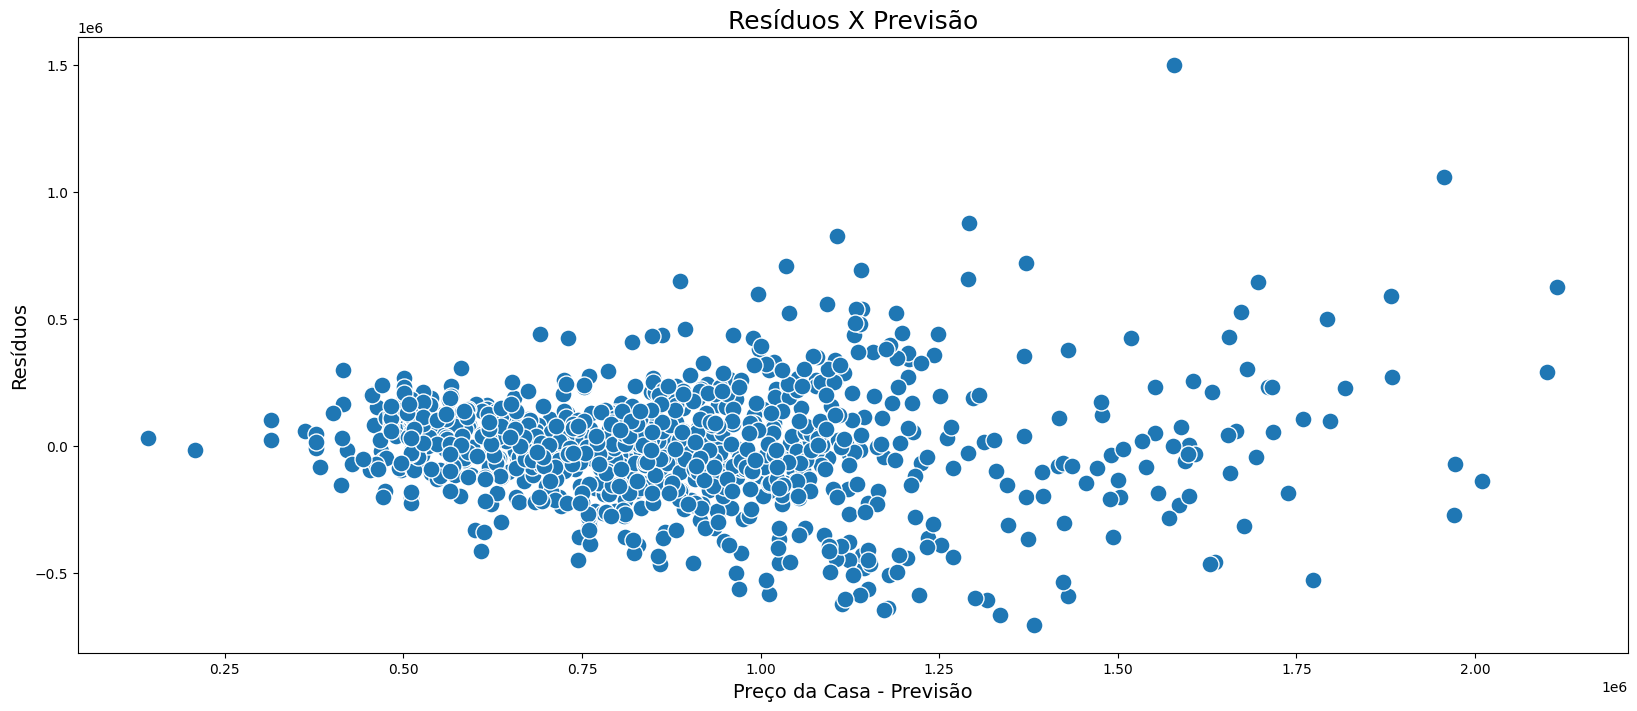

In [ ]:
ax = sns.scatterplot(x= y_previsto_train   , y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax


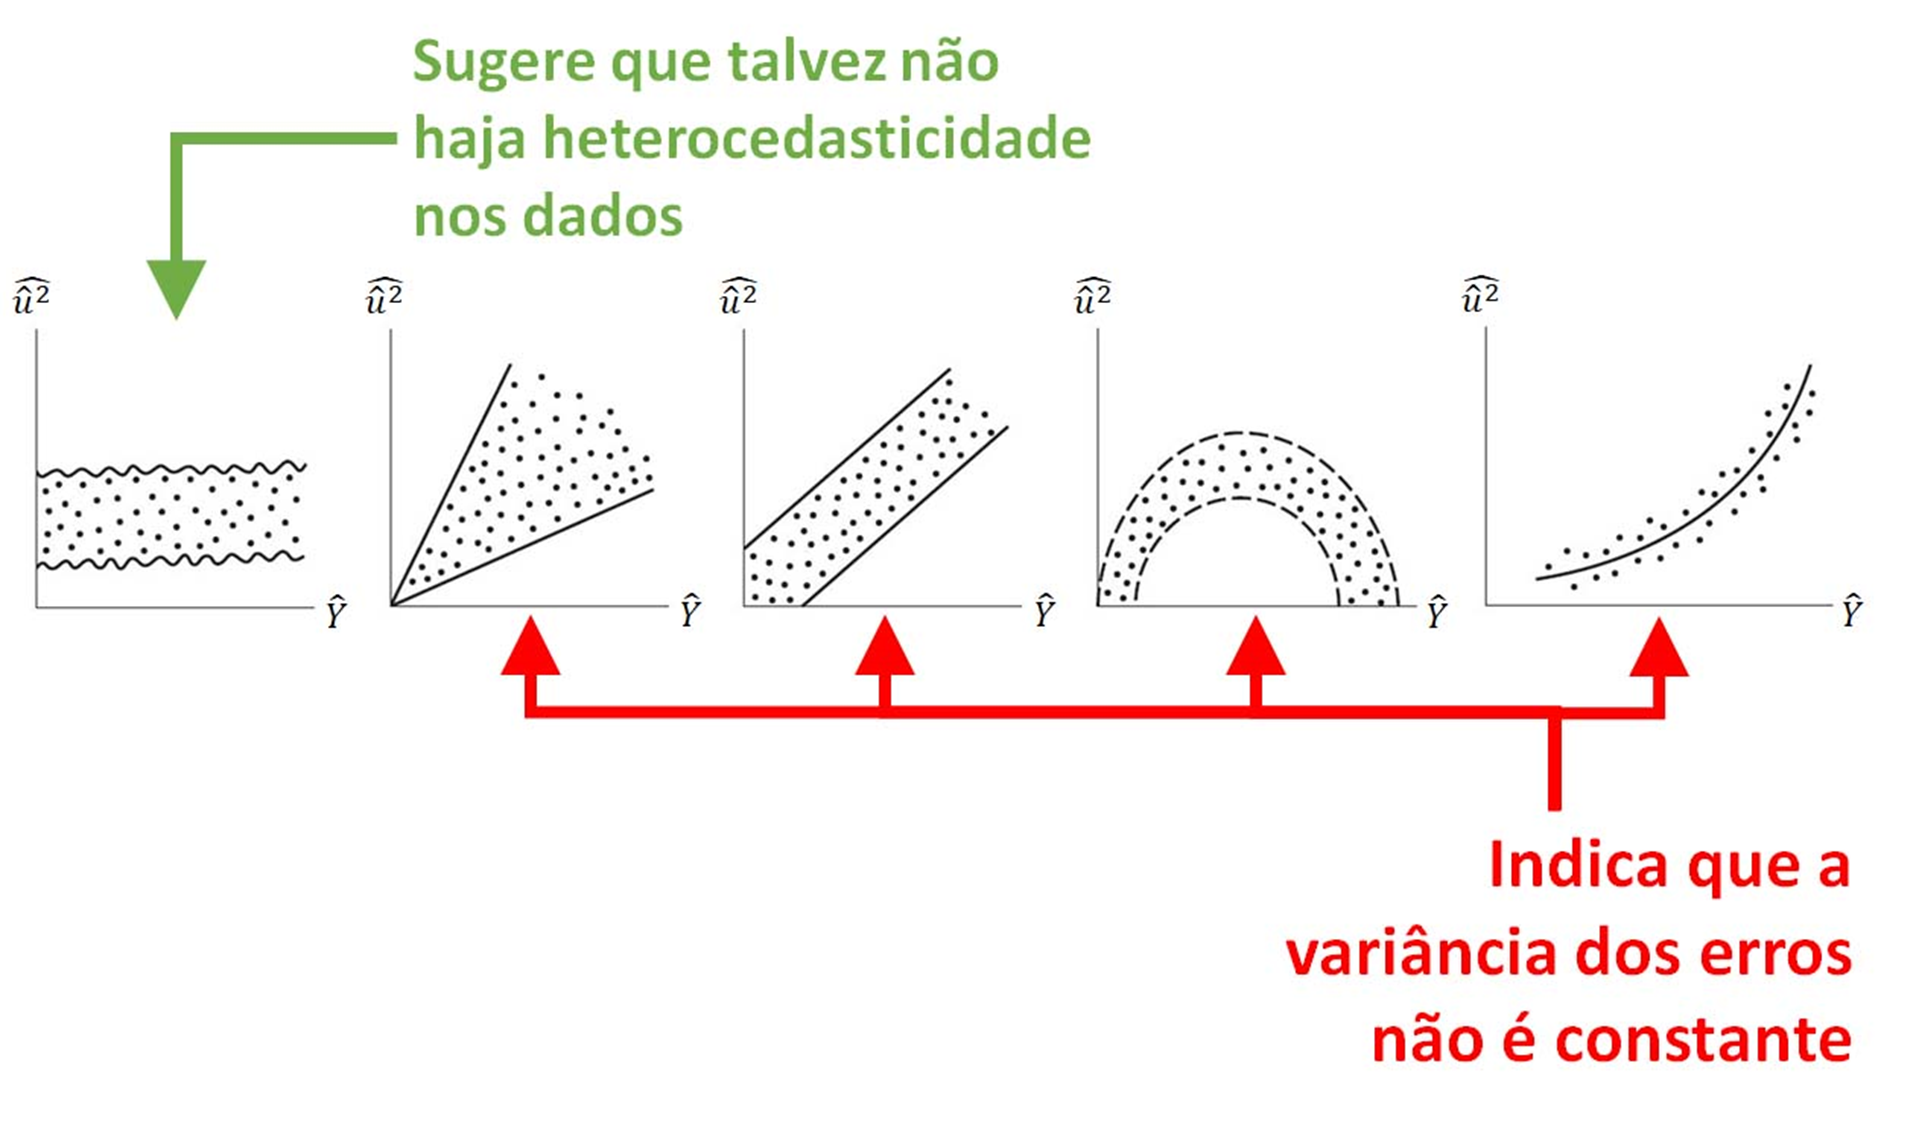